# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bobdi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key text.latex.preview in file C:\Users\bobdi\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\bobdi\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\bobdi\ana

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = '3b0c97a6322c459cb7b9e69a3e5be7cb'

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [12]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [13]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [14]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876
1,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831
2,"Over the last five years, about 25,000 of thos...",-0.4939,0.000,0.091,0.909
3,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853
4,The couple would never flee from the country a...,-0.3400,0.057,0.118,0.825


In [17]:
# Create the Ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899
1,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848
2,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941
3,This enables an L1 platform to bootstrap its n...,0.0000,0.000,0.000,1.000
4,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812


In [18]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.064990,0.06605,0.049450,0.884550
std,0.470074,0.05442,0.069553,0.070311
min,-0.757900,0.00000,0.000000,0.729000
25%,-0.272000,0.02925,0.000000,0.835500
50%,0.064000,0.05500,0.000000,0.881500
75%,0.462600,0.12100,0.097750,0.937250
max,0.778300,0.16300,0.211000,1.000000


In [19]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.001815,0.046750,0.037400,0.915900
std,0.340519,0.066896,0.050202,0.084311
min,-0.680800,0.000000,0.000000,0.766000
25%,-0.150025,0.000000,0.000000,0.842250
50%,0.000000,0.019500,0.000000,0.942500
75%,0.109025,0.059500,0.067250,1.000000
max,0.834100,0.234000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [20]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [21]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [22]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Remove the punctuation from text
    words = list(filter(lambda t: t not in punctuation, words))
   
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [23]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876,"[Even, arent, paying, attention, Bitcoin, cryp..."
1,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831,"[Netflix, making, docuseries, one, worst, rapp..."
2,"Over the last five years, about 25,000 of thos...",-0.4939,0.000,0.091,0.909,"[last, five, year, 25,000, Bitcoin, transferre..."
3,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853,"[Even, cyberspace, Department, Justice, able, ..."
4,The couple would never flee from the country a...,-0.3400,0.057,0.118,0.825,"[couple, would, never, flee, country, risk, lo..."


In [24]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899,"[people, buy, cryptocurrencies, intended, hold..."
1,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848,"[February, shit, hit, fan, usual, way, old, tw..."
2,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941,"[Technical, analysis, isnt, perfect, tool, may..."
3,This enables an L1 platform to bootstrap its n...,0.0000,0.000,0.000,1.000,"[enables, L1, platform, bootstrap, national, e..."
4,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812,"[Coinbase, reported, share, trading, volume, e..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [25]:
from collections import Counter
from nltk import ngrams

In [26]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'Feb'), 5),
 (('Reuters', 'Bitcoin'), 3),
 (('Mr.', 'Lichtensteins'), 2),
 (('Lichtensteins', 'wallet'), 2),
 (('Feb', '11'), 2),
 (('11', 'Reuters'), 2),
 (('Even', 'arent'), 1),
 (('arent', 'paying'), 1),
 (('paying', 'attention'), 1),
 (('attention', 'Bitcoin'), 1),
 (('Bitcoin', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'might'), 1),
 (('might', 'noticed'), 1),
 (('noticed', 'value'), 1),
 (('value', 'plummeted'), 1),
 (('plummeted', 'last'), 1),
 (('last', 'week'), 1),
 (('week', 'total'), 1),
 (('total', 'value'), 1),
 (('value', 'market'), 1)]

In [27]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'Feb'), 4),
 (('324', 'million'), 4),
 (('million', 'cryptocurrency'), 3),
 (('trading', 'volume'), 2),
 (('15', 'million'), 2),
 (('profile', 'picture'), 2),
 (('char', 'Online'), 2),
 (('Online', 'thief'), 2),
 (('thief', 'made'), 2),
 (('worth', 'nearly'), 2),
 (('nearly', '324'), 2),
 (('million', 'Getty'), 2),
 (('Getty', 'Images'), 2),
 (('Images', 'Hackers'), 2),
 (('cryptocurrency', 'Wormhole'), 2),
 (('Wormhole', 'developer'), 2),
 (('char', 'version'), 2),
 (('version', 'article'), 2),
 (('article', 'published'), 2),
 (('published', 'TIME'), 2)]

In [28]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [29]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Bitcoin', 11),
 ('Reuters', 7),
 ('Feb', 6),
 ('crypto', 5),
 ('cryptocurrencies', 4),
 ('world', 4),
 ('bitcoin', 4),
 ('last', 3),
 ('one', 3)]

In [30]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('cryptocurrency', 7),
 ('million', 7),
 ('Ethereum', 5),
 ('ethereum', 4),
 ('year', 4),
 ('Feb', 4),
 ('Reuters', 4),
 ('324', 4),
 ('NFTs', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [32]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

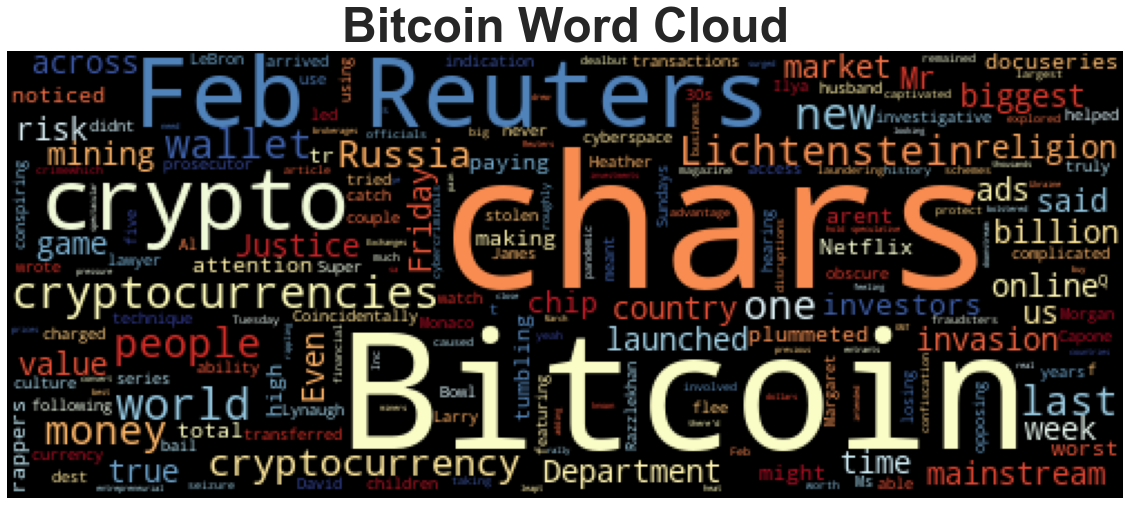

In [33]:
# Generate the Bitcoin word cloud
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

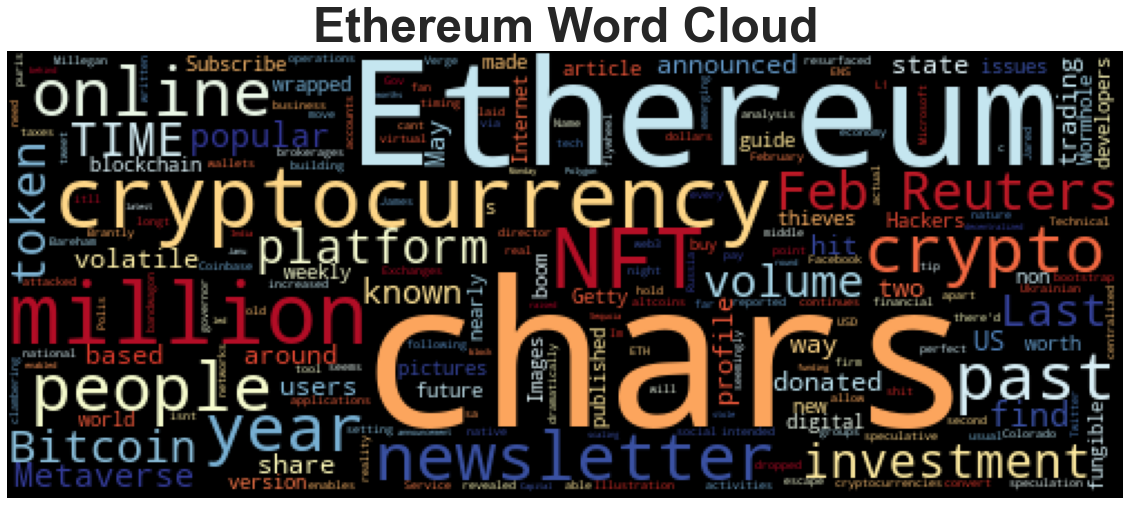

In [34]:
# Generate the Ethereum word cloud
wordcloud(eth.text.str.cat(), title="Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [35]:
import spacy
from spacy import displacy

In [36]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [37]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [38]:
# Concatenate all of the Bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]Netflix\r\n is making a docuseries about one of the worst rappers of all time\r\n. Coincidentally, Heather "Razzlekhan" Morgan and her husband, Ilya Lichtenstein, were charged this week with conspiring t… [+1432 chars]Over the last five years, about 25,000 of those Bitcoin were transferred out of Mr. Lichtensteins wallet using a complicated series of transactions meant to obscure that the currency had been stolen … [+2506 chars]Even in cyberspace, the Department of Justice is able to use a tried and true investigative technique, following the money, Ms. Monaco said. Its what led us to Al Capone in the 30s. It helped us dest… [+1176 chars]The couple would never flee from the country at the risk of losing access to their ability to have children, the lawyer wrote.\r\nAt the he

In [39]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [40]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [41]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

last week DATE
3 MONEY
about one CARDINAL
Ilya Lichtenstein PERSON
this week DATE
the last five years DATE
about 25,000 CARDINAL
Lichtensteins PERSON
the Department of Justice ORG
Monaco PERSON
Al Capone LOC
Margaret Lynaugh PERSON
Super Bowl EVENT
Larry David PERSON
LeBron James PERSON
+3454 ORG
one CARDINAL
Tuesday DATE
$4.5 billion MONEY
Lichtensteins PERSON
Feb. 1 DATE
roughly $3.6 billion MONEY
one 2020 DATE
4 DATE
Reuters ORG
8.82% PERCENT
40,611.4 MONEY
2202 DATE
Friday DATE
3,291.29 MONEY
Bitcoin PERSON
23.2% PERCENT
22 CARDINAL
Reuters ORG
2021 DATE
thousands CARDINAL
Reuters ORG
Russia GPE
Ukraine GPE
YouTube ORG
Alex Castro PERSON
Verge ORG
BitConnect ORG
Getty GPE
Russia GPE
last Thursday DATE
Ukranian NORP
Mexico City GPE
Telegr ORG
Bitcoin WORK_OF_ART
Bloombergs Lorcan Roche Kelly ORG
first ORDINAL
the 21st cen DATE
15 CARDINAL
Reuters ORG
Europe LOC
two CARDINAL
Russia GPE
Reuters ORG
2022 DATE
Feb 11 DATE
Reuters ORG
Federal Reserve ORG
11 CARDINAL
Reuters ORG
Intel Cor

---

### Ethereum NER

In [42]:
# Concatenate all of the Ethereum text together
all_eth_text = eth.text.str.cat()
all_eth_text

'If people who buy cryptocurrencies intended only to hold on to them as speculative investments, there\'d be no real need for crypto wallets. Exchanges and online brokerages that convert dollars to, sa… [+3031 chars]In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]Technical analysis isnt a perfect tool, but it may point the way for Ethereum\r\nEthereum\xa0(ETH-USD\r\n) continues to be a volatile crypto investment. Crypto is volatile by nature Im not setting it apart … [+3612 chars]This enables an L1 platform to bootstrap its national economy over time through a flywheel between financial speculation around its native token and actual building of applications and activities in … [+4057 chars]Coinbase reported that the share of trading volume for ethereum and other altcoins increased last year, while bitcoin\'s share dropped 

In [43]:
# Run the NER processor on all of the text
doc = nlp(all_eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [44]:
# Render the visualization
displacy.render(doc, style='ent',jupyter=True)

In [45]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

February DATE
Ethereum Name Service ORG
ENS ORG
May 201 DATE
Ethereum ORG
ETH-USD ORG
Crypto PERSON
last year DATE
Between 2020 and 2021 DATE
Colorado GPE
the middle of this year DATE
US GPE
Jared Polis PERSON
James Bareham PERSON
More than $15 million MONEY
More than $15 million MONEY
Ukrainian GPE
Russia GPE
2022 DATE
Facebook ORG
Microsoft ORG
Twitter PRODUCT
Ethereum ORG
second ORDINAL
two months DATE
NFT ORG
7 CARDINAL
Reuters ORG
Monday DATE
$450 million MONEY
Sequoia Capital India ORG
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
120,000 CARDINAL
wEth ORG
Ethereum ORG
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
two hours TIME
YouTube ORG
Waka Flacka Fla ORG
the past few years DATE
NFT ORG
$23 billion MONEY
4 CARDINAL
Reuters ORG
8.82% PERCENT
40,611.4 MONEY
2202 DATE
Friday DATE
3,291.29 MONEY
Bitcoin PERSON
23.2% PERCENT
TIME ORG
weekly DATE
TIME ORG
weekly DATE
3 CARDINAL
Reuters ORG
NF

---